In [2]:
source('lib.r')


In [3]:

scon = readRDS('conos.T.rds')
load('cell.ano.RData')


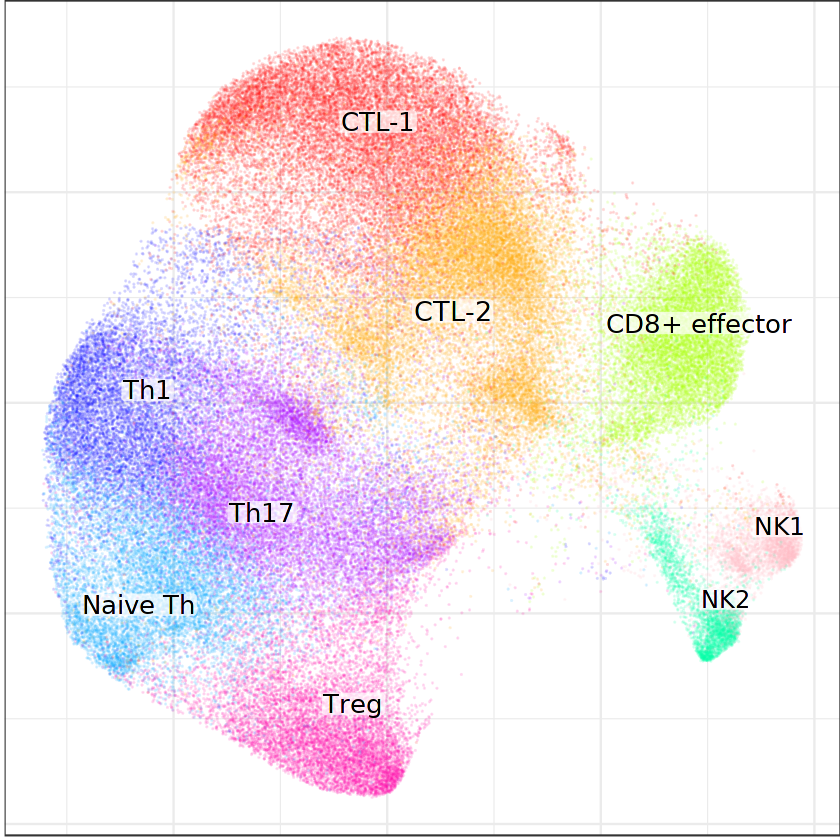

In [4]:
anoT.pal <- setNames(rainbow(length(levels(anoT))),levels(anoT));
anoT.pal['NK1']='pink'
anoT.palf <- function(n) return(anoT.pal)
a2=scon$plotGraph(groups=anoT,raster=TRUE,plot.na=F,size=0.1,alpha=0.1,font.size = c(5, 5.5),palette=anoT.palf)
a2



[1]    24 98387

[1] "blue"
[1] "white"
[1] "red"


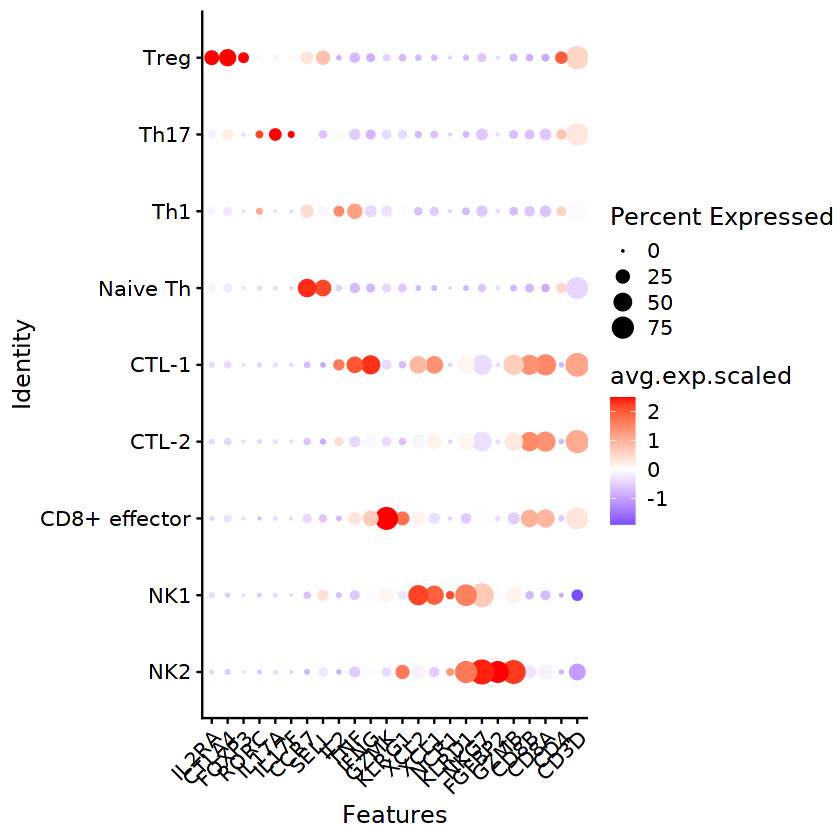

In [12]:
library(cowplot)

gs=c('CD3D','CD4','CD8A','CD8B','GZMB','FGFBP2','NKG7','KLRD1','NCR1','XCL1','XCL2','KLRG1','GZMK','IFNG','TNF','IL2','SELL','CCR7',"IL17F",  "IL17A","RORC" , 'FOXP3', 'CTLA4','IL2RA')


anoT2=ordered(as.factor(anoT),levels=c('NK2','NK1','CD8+ effector','CTL-2','CTL-1','Naive Th','Th1','Th17','Treg'))

cname=names(anoT)
aexp <- do.call(rbind,lapply(sn(gs),function(gene) conos:::getGeneExpression(scon,gene)))
aexp[is.na(aexp)]=0
dim(aexp)

gs=intersect(gs,rownames(aexp))
#cname=intersect(cname,colnames(aexp))
p=Dotfig(gs,aexp[,cname],anoT2[cname],cols = c("blue","white", "red"))
p

Using SampleType as value column: use value.var to override.



,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,CTL-1,HP0,0.10386221
2,CTL-2,HP0,0.56524008
3,CD8+ effector,HP0,0.06263048
4,NK1,HP0,0.03027140
5,NK2,HP0,0.02974948
6,Naive Th,HP0,0.04331942


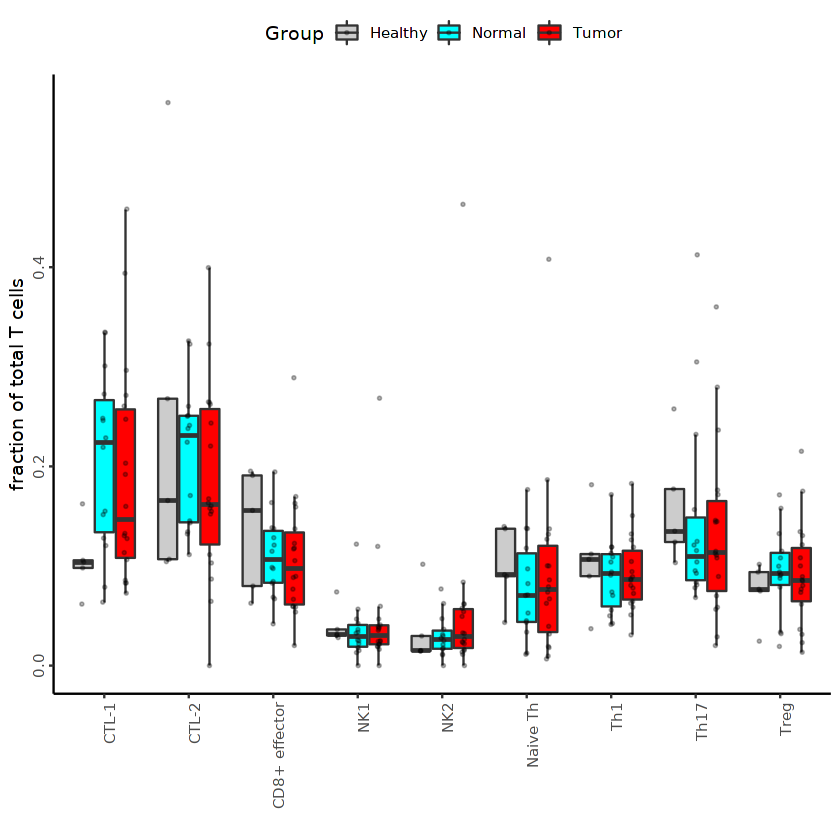

In [13]:


cname=names(anoT)
ano2=data.frame('Cell'=anoT[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)
tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
head(tmp4)
names(tmp4) <- c('cell', 'sample','pc.of.sample')

tmp4$Group=NULL
tmp4$Group=sample.groups[as.character(tmp4$sample)]


p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total T cells")+theme(legend.position="top")+
  scale_fill_manual(values=fraction.palette1)
p



In [14]:

library(ggpubr)

df=tmp4
rsig=NULL
for (i in unique(df[,1])){
  tmp=df[df[,1]==i,]

  sig=compare_means(pc.of.sample ~ Group,  data = tmp) # 
  sig$cell=i
  rsig=rbind(rsig,sig)
  #sig[sig$p.signif!='ns',]
}

write.table(rsig,'fraction.1.pvalue.xls',sep='\t',col.names=T,row.names=F,quote=F)


In [7]:
ylab='Exhaustion Score'

readG=function(f){
  tmp=read.csv(f,sep='\t',header=F)
  as.character(tmp[,1])
}

Exh=readG('/d0-mendel/home/meisl/bin/data/manouk/Exhau.txt')
cname=intersect(names(anoT),rownames(sp2$counts))

gs=Exh


In [11]:
print('Exhaustion score')
options(warinings=-1)

cname=intersect(names(anoT),rownames(sp2$counts))

df=Signature_score(anoT[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=5,magnitude.normal = TRUE)

library(ggpubr)
#df2=df[df$fraction=='T-HG',]
p=drawBoxplot(ylab,df,ylab,myeloid.col=NULL,limHeight=1.2,height=2.7,width=2.4)


[1] "Exhaustion score"


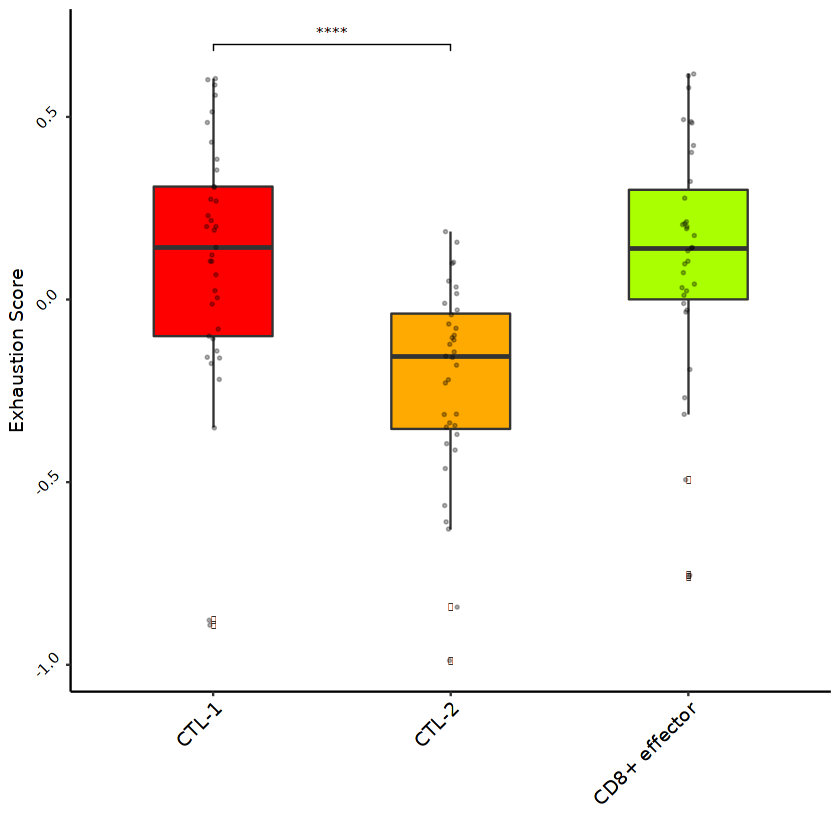

In [14]:
options(warn = -1)
df2=df[df$cell %in% c('CTL-1','CTL-2','CD8+ effector'),]
drawBoxplot('cytotoxcity in CTL',df2,ylab,myeloid.col=anoT.pal,limHeight=1.15,height=2.4,width=2.2)


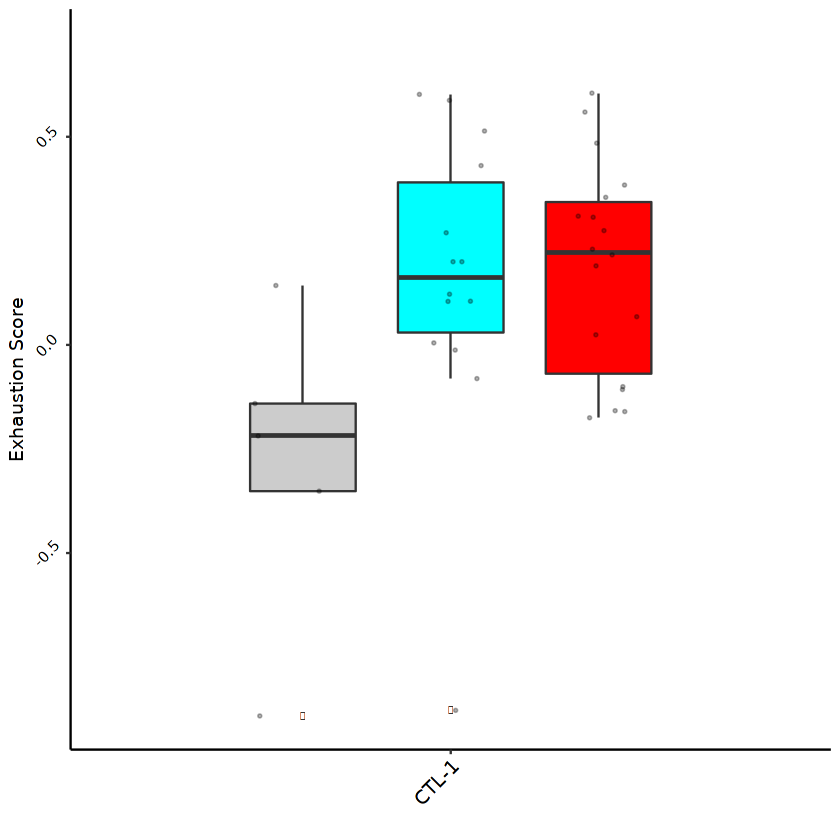

In [15]:
df2=df[df$cell %in% c('CTL-1'),]


df2$cell=df2$fraction
tmp=df2
ysize=11
xsize=11
limHeight=1.2
name2=ylab
tmp$cell2=apply(data.frame(rownames(tmp)),1,function(x) strsplit(x,'[|]')[[1]][1])

 p1 <- ggplot(tmp, aes(x=cell2,fill=fraction,y=score))+theme_classic() + geom_boxplot(outlier.shape = -1,width=0.5,position=position_dodge(width=0.7)) +theme_classic() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + xlab("")  + ylab(name2)
  p1=p1+ geom_point(data = tmp,size=0.5,color=adjustcolor(1,alpha=0.3), position = position_jitterdodge(0.3)) 
  
  p1=p1+ylim(c(min(tmp$score),max(tmp$score)*limHeight))
  #p1=p1+ geom_point(data = tmp,color=adjustcolor(1,alpha=0.3),fill='grey', size = 1, shape = 21)
  p1=p1+ theme(legend.position="none")
  p1=p1+theme(axis.text.x = element_text(angle = 45, hjust = 1))
  p1=p1+theme( axis.text.y = element_text(angle = 45, hjust = 0.5,color = "black"),axis.text.x=element_text(size=xsize,color = "black"),axis.title.y = element_text(size = ysize,color = "black"))
  
  p1=p1+scale_fill_manual(values=fraction.palette1)
 
  p1

In [17]:
d1 = readRDS('MDSC score.dat.rds')
d2 = readRDS('Treg activity.dat.rds')
cell1 = 'Mono2'
cell2 = 'Treg'
d1=d1[d1$cell==cell1,]
d2=d2[d2$cell==cell2,]
d1[1:4,]
d2[1:4,]


dim(d1)
dim(d2)
rownames(d1)=d1$sample
rownames(d2)=d2$sample



t1 = rownames(d1)
t1 = intersect(t1,rownames(d2))

df = data.frame('name'=t1,'x' = d1[t1,'score'],'y'=d2[t1,'score'],'fraction' = d2[t1,'fraction'])
df$fraction2 = df$fraction
df$fraction = sample.groups2[Toch(df$name)]


labx = 'MDSC in Mono2'
laby = 'Treg Activity in Tregs'


,score,cell,fraction,sample,name
,<dbl>,<ord>,<ord>,<fct>,<chr>
Mono2|HP0|Healthy,0.0995849,Mono2,Healthy,HP0,Mono2 HP0
Mono2|HP1|Healthy,0.9454071,Mono2,Healthy,HP1,Mono2 HP1
Mono2|HP2|Healthy,0.5819756,Mono2,Healthy,HP2,Mono2 HP2
Mono2|HP3|Healthy,1.0295860,Mono2,Healthy,HP3,Mono2 HP3


,score,cell,fraction,sample,name
,<dbl>,<ord>,<ord>,<fct>,<chr>
Treg|HP0|Healthy,-0.3068431,Treg,Healthy,HP0,Treg HP0
Treg|HP1|Healthy,1.4748127,Treg,Healthy,HP1,Treg HP1
Treg|HP2|Healthy,1.2333566,Treg,Healthy,HP2,Treg HP2
Treg|HP3|Healthy,1.1569370,Treg,Healthy,HP3,Treg HP3


[1] 37  5

[1] 36  5

In [18]:
draw.scatter = function(df2,fit.line = NULL,labx = 'x',laby = 'y',fraction.palette2){
  ct <- cor.test(df2$x,df2$y,alternative='greater')
  df2$sample=rownames(df2)
  gg <- ggplot(na.omit(df2), aes(x=x,y=y)) + geom_point(size=2,aes(color=fraction))  +
    theme_bw() +
    theme(axis.text.y=element_text(angle=90))  + #guides(color=F) + #geom_text_repel(aes(color=sample))
    xlab(labx) + ylab(laby) +scale_color_manual(values=fraction.palette2)+
    theme(legend.position='top')
  if(!is.null(fit.line)){
    gg=gg+geom_smooth(method='lm',linetype='dashed',alpha=0.05,size=0.5)  +   geom_text(x=Inf,y=Inf,label=paste('R=',round(ct$estimate,2),' ','p=',round(ct$p.value,2),sep=''),hjust=1.2,vjust=1.2,size=3.5)

  }
  return(gg)
}

`geom_smooth()` using formula 'y ~ x'



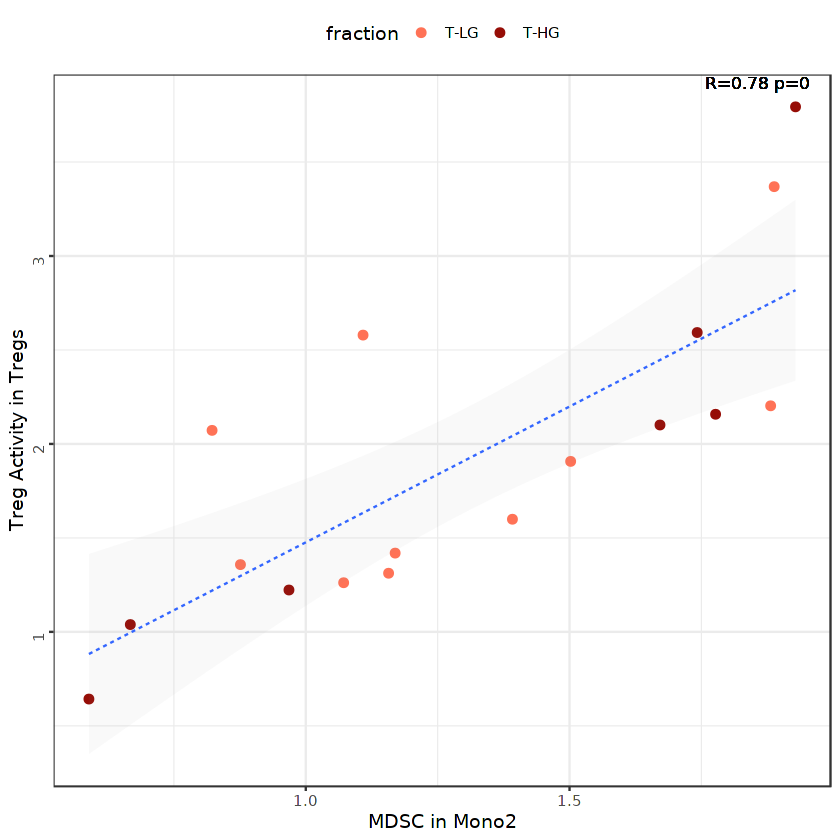

In [19]:
df2 = df[df$fraction2=='Tumor',]
df2$fraction = Toch(df2$fraction )
p1 = draw.scatter(df2,fit.line = TRUE,labx = labx,laby=laby,fraction.palette=fraction.palette2[unique(df2$fraction )])
p1

`geom_smooth()` using formula 'y ~ x'



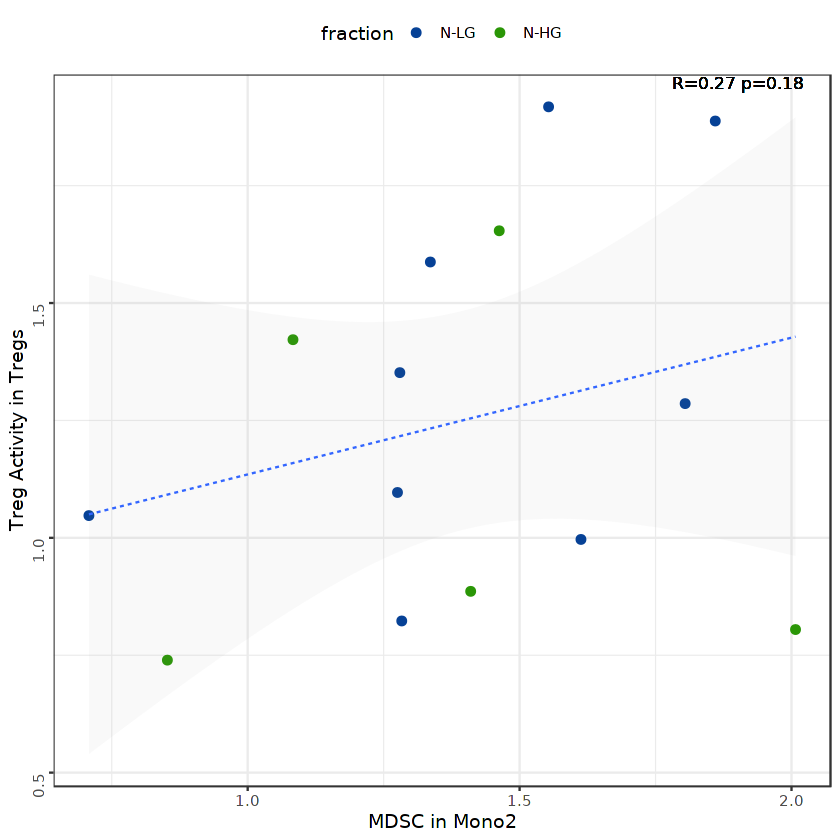

In [20]:
df2 = df[df$fraction2=='Normal',]
df2$fraction = Toch(df2$fraction )

p2=draw.scatter(df2,fit.line = TRUE,labx = labx,laby=laby,fraction.palette=fraction.palette2[unique(df2$fraction )])
p2

In [21]:
df = getExp_Sample(t(sp2$counts),'CCR6',anoT,ssamp,stype,min.num.cell=5,scale=NULL)


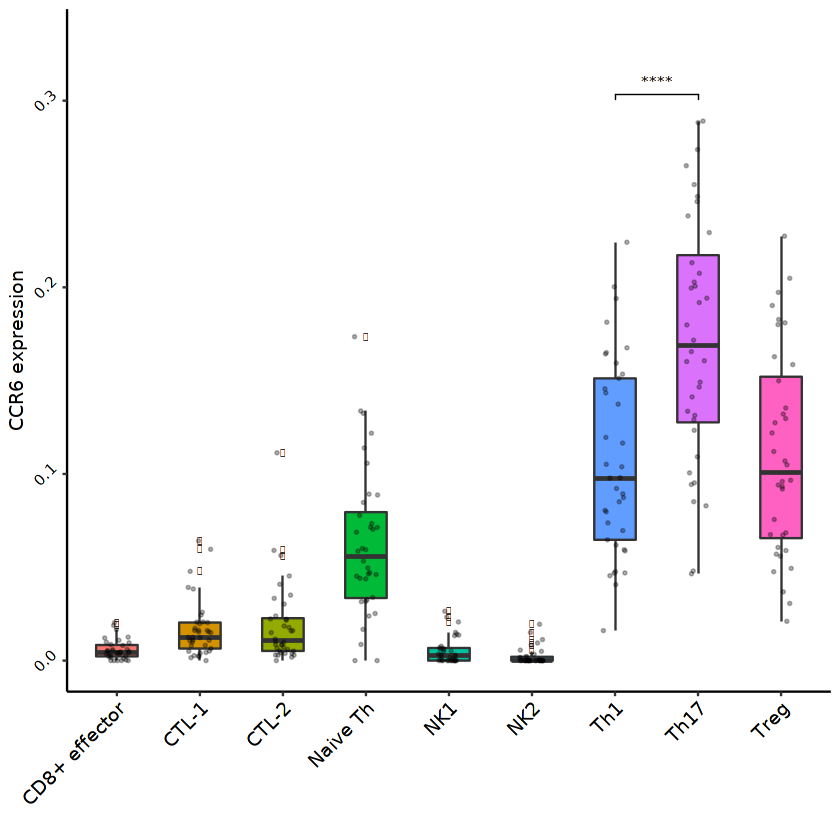

In [22]:
dat2 = data.frame(score = df[['score']], cell = df[['group']], sample = df[['sample']] , type = df[['fraction']])

#dat2$cell=ordered(as.factor(dat2$cell),levels=c('CD4+ Naive','CD8+ Naive','NK','NKT','CTL-1','CTL-2','Th1/17','Treg'))

#drawBoxplot(dat2,'CCR6 expression',Tcell.col[as.character(unique(anoCell))])
drawBoxplot('CCR6',dat2,'CCR6 expression',NULL,limHeight=1.15,sigl=c('Th1','Th17'),height=2.5,width=2.84)
